In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly
import squarify
import plotly.graph_objs as go 
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing  import OneHotEncoder
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
import xgboost as xgb

In [3]:
data=pd.read_csv("Customer-Churn-Records (1).csv")

In [4]:
target_var=data['Exited']
target_var.value_counts()


0    7962
1    2038
Name: Exited, dtype: int64

In [5]:
data.shape

(10000, 18)

In [6]:
data.isnull().any()
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [7]:
col_name=data.columns

In [8]:
for i in data.columns:
    print ("number of unique :{}\n{}\n uniquevalues \n{}".format(i,data[i].nunique(),data[i].unique()))
    print ("---------------------- \n")

number of unique :RowNumber
10000
 uniquevalues 
[    1     2     3 ...  9998  9999 10000]
---------------------- 

number of unique :CustomerId
10000
 uniquevalues 
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------- 

number of unique :Surname
2932
 uniquevalues 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------- 

number of unique :CreditScore
460
 uniquevalues 
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 

In [9]:
unq=data[['RowNumber','CustomerId']]


In [10]:
data=data.drop(['RowNumber','CustomerId','Complain'], axis =1)

In [11]:
data_cat=data.select_dtypes(include=['object'])
data_numerical=data.select_dtypes(exclude=['object'])


In [12]:
for i in data_numerical.columns:
          if data_numerical[i].nunique()<15:
            data_cat[i]= data_numerical[i]
            data_numerical=data_numerical.drop(i,axis=1)

In [13]:
#dataset=pd.get_dummies(columns=data_catco,data=data,drop_first=True,prefix='cata',prefix_sep='_')
print(data_cat)
print()

        Surname Geography  Gender Card Type  Tenure  NumOfProducts  HasCrCard  \
0      Hargrave    France  Female   DIAMOND       2              1          1   
1          Hill     Spain  Female   DIAMOND       1              1          0   
2          Onio    France  Female   DIAMOND       8              3          1   
3          Boni    France  Female      GOLD       1              2          0   
4      Mitchell     Spain  Female      GOLD       2              1          1   
...         ...       ...     ...       ...     ...            ...        ...   
9995   Obijiaku    France    Male   DIAMOND       5              2          1   
9996  Johnstone    France    Male  PLATINUM      10              1          1   
9997        Liu    France  Female    SILVER       7              1          0   
9998  Sabbatini   Germany    Male      GOLD       3              2          1   
9999     Walker    France  Female   DIAMOND       4              1          1   

      IsActiveMember  Exite

In [14]:
print('data_cat columns',data_cat.columns,'\n')
print('data_numerical columns',data_numerical.columns)

data_cat columns Index(['Surname', 'Geography', 'Gender', 'Card Type', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Satisfaction Score'],
      dtype='object') 

data_numerical columns Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'], dtype='object')


In [15]:
encoder=LabelEncoder()
data['Surname']=encoder.fit_transform(data['Surname'])







col=data_cat.columns.drop(['Surname','Exited'])
data=data.drop(['Exited'],axis=1)

In [16]:
x=data.columns.drop(col)
dataset=pd.DataFrame()
dataset[x]=data[x]


In [17]:
for i in data[col]:
    j=pd.get_dummies(data=data[i],drop_first=True,prefix='cata{}'.format(i),prefix_sep='_')
    dataset=pd.concat([dataset,j],axis=1)

In [18]:
 dataset.sample(5)

,Surname,CreditScore,Age,Balance,EstimatedSalary,Point Earned,cataGeography_Germany,cataGeography_Spain,cataGender_Male,cataCard Type_GOLD,...,cataTenure_10,cataNumOfProducts_2,cataNumOfProducts_3,cataNumOfProducts_4,cataHasCrCard_1,cataIsActiveMember_1,cataSatisfaction Score_2,cataSatisfaction Score_3,cataSatisfaction Score_4,cataSatisfaction Score_5
9547,1743,626,34,0.00,37870.29,604,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8821,790,662,42,105021.28,48242.38,313,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
730,2085,591,24,147360.00,25310.82,602,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
4866,1996,522,37,95022.57,129107.59,534,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
5171,1971,537,39,0.00,137651.60,413,0,0,1,0,...,0,1,0,0,1,1,1,0,0,0


In [19]:
# dataset.columns.nunique()

31

In [20]:
## model selection 

## train test split 

In [21]:
# X=dataset
# Y=target_var 
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=55)


In [22]:
# #confusion matrix 
# def evalmat(truevalue,predict):
#     cm=confusion_matrix(truevalue,predict)
#     print(cm)
#     tn=cm[0,0]
#     fp=cm[0,1]
#     fn=cm[1,0]
#     tp=cm[1,1]
#     #Sensitivity/ Recall/ True Positive Rate = TP / [TP + FN]
#     recall=tp/[tp/fn]
#     #Specificity/TNR = TN / [TN + FP]
#     specificity=tn/(tn+fp)
#    #Accuracy = [TP + TN] / [TP + FN + FP + TN]
#     accuracy= (tp + tn) / (tp + fn + fp + tn)
#     #Precision = TP / [TP + FP]
#     Precision = tp / (tp + fp)
#     #F1-Score = [2 x Precision x Recall] / [Precision + Recall]
#     F1_Score = (2*Precision*recall) /(Precision + recall)
#     print('recall=',recall,'\n')
#     print('specificity=',specificity,'\n','accuracy=',accuracy,'\n','Precision=',Precision,'\n')
#     print('F1_Score =',F1_Score,'\n')

## decision tree 

In [23]:
# ## dicision tree classifier in rfe starting or top  2  featues are enough to gain 100% acciuracy  
# X=dataset
# Y=target_var 
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=55)
# modeldt=tree.DecisionTreeClassifier()
# modeldt.fit(X_train,Y_train)
# dt_train_pread=modeldt.predict(X_train)
# dt_test_pread=modeldt.predict(X_test)
# print('train evelution metrics\n')
# evalmat(Y_train,dt_train_pread)
# print('test evelution metrics\n')
# evalmat(Y_test,dt_test_pread)



train evelution metrics

[[6364    0]
 [   0 1636]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test evelution metrics

[[1349  249]
 [ 180  222]]
recall= [180.] 

specificity= 0.844180225281602 
 accuracy= 0.7855 
 Precision= 0.4713375796178344 

F1_Score = [0.94021317] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\2557941390.py:10: RuntimeWarning:

divide by zero encountered in longlong_scalars



## random forest model 

In [24]:
# modelrf=RandomForestClassifier()

In [25]:
# modelrf.fit(X_train,Y_train)

RandomForestClassifier()

In [26]:
# rf_train_pred=modelrf.predict(X_train)
# rf_test_pred=modelrf.predict(X_test)

In [27]:
# print('train evelution metrics\n')
# evalmat(Y_train,rf_train_pred)
# print('test evelution metrics\n')
# evalmat(Y_test,rf_test_pred)

train evelution metrics

[[6364    0]
 [   0 1636]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test evelution metrics

[[1535   63]
 [ 212  190]]
recall= [212.] 

specificity= 0.9605757196495619 
 accuracy= 0.8625 
 Precision= 0.7509881422924901 

F1_Score = [1.49667447] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\2557941390.py:10: RuntimeWarning:

divide by zero encountered in longlong_scalars



## svm 

In [28]:
#  modelsvm=svm.SVC(kernel='linear')
# scaler=MinMaxScaler()
# X=dataset
# Y=target_var 
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=55)
# X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])

In [29]:
# modelsvm.fit(X_train,Y_train)
# modelsvm_train_pred=modelsvm.predict(X_train)
# modelsvm_test_pred=modelsvm.predict(X_test)

In [30]:
# modelsvm_train_pred=modelsvm.predict(X_train)
# modelsvm_test_pred=modelsvm.predict(X_test)

In [31]:
# print('train evelution metrics\n')
# evalmat(Y_train,modelsvm_train_pred)
# print('test evelution metrics\n')
# evalmat(Y_test,modelsvm_test_pred)

train evelution metrics

[[5539   35]
 [1231  195]]
recall= [1231.] 

specificity= 0.9937208467886617 
 accuracy= 0.8191428571428572 
 Precision= 0.8478260869565217 

F1_Score = [1.69448513] 

test evelution metrics

[[1425  963]
 [ 443  169]]
recall= [443.] 

specificity= 0.5967336683417085 
 accuracy= 0.5313333333333333 
 Precision= 0.14929328621908128 

F1_Score = [0.29848598] 



## xg boost 

In [32]:
# modelxg=xgb.XGBClassifier()

In [33]:
# modelxg.fit(X_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
# xg_train_pred=modelxg.predict(X_train)
# xg_test_pred=modelxg.predict(X_test)

In [35]:
# print('train evelution metrics\n')
# evalmat(Y_train,xg_train_pred)
# print('test evelution metrics\n')
# evalmat(Y_test,xg_test_pred)

train evelution metrics

[[5557   17]
 [ 115 1311]]
recall= [115.] 

specificity= 0.9969501255830642 
 accuracy= 0.9811428571428571 
 Precision= 0.9871987951807228 

F1_Score = [1.95759295] 

test evelution metrics

[[2376   12]
 [ 571   41]]
recall= [571.] 

specificity= 0.9949748743718593 
 accuracy= 0.8056666666666666 
 Precision= 0.7735849056603774 

F1_Score = [1.54507656] 



## logistic regression

In [36]:
#  modellr=LogisticRegression()
# scaler=MinMaxScaler()
# X=dataset
# Y=target_var 
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=55)
# X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])

In [37]:
#  modellr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
# modellr_train_pred=modellr.predict(X_train)
# modellr_test_pred=modellr.predict(X_test)


In [39]:
# print('train evelution metrics\n')
# evalmat(Y_train,modellr_train_pred)
# print('test evelution metrics\n')
# evalmat(Y_test,modellr_test_pred)

train evelution metrics

[[6114  250]
 [1031  605]]
recall= [1031.] 

specificity= 0.9607165304839723 
 accuracy= 0.839875 
 Precision= 0.7076023391812866 

F1_Score = [1.41423405] 

test evelution metrics

[[956 642]
 [301 101]]
recall= [301.] 

specificity= 0.5982478097622027 
 accuracy= 0.5285 
 Precision= 0.13593539703903096 

F1_Score = [0.27174807] 



## as random forest evelutationary metrics are good we take to improve the mode 

In [40]:
modelrf=RandomForestClassifier()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=55)
rfe=RFE(modelrf,n_features_to_select=10,verbose=15)
rfe.fit(X_train,Y_train)
names=X_train.columns.tolist()

b=rfe.ranking_
a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

RFE_selected=a['features'][a['rank']==1]

RFE_selected
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]





Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


In [41]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [42]:
modelrf=modelrf.fit(X_train,Y_train)
rf_train_pred=modelrf.predict(X_train)
rf_test_pred=modelrf.predict(X_test)

print('train evelution metrics\n')
evalmat(Y_train,rf_train_pred)
print('test evelution metrics\n')
evalmat(Y_test,rf_test_pred)

train evelution metrics

[[6364    0]
 [   0 6364]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test evelution metrics

[[1332  266]
 [ 115  287]]
recall= [115.] 

specificity= 0.8335419274092616 
 accuracy= 0.8095 
 Precision= 0.5189873417721519 

F1_Score = [1.03331142] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\2557941390.py:10: RuntimeWarning:

divide by zero encountered in longlong_scalars



In [43]:
rfi=modelrf.feature_importances_
pd.Series(rfi).nunique()


10

In [44]:
feature_importances=pd.DataFrame({'index':X_train.columns,'values':rfi})


In [45]:
feature_importances=feature_importances.sort_values(by='values',ascending=False)
feature_importances


,index,values
8,cataNumOfProducts_2,0.202323
0,Age,0.189926
1,Balance,0.104348
5,Surname,0.100400
7,cataIsActiveMember_1,0.099074
3,EstimatedSalary,0.097784
4,Point Earned,0.097683
2,CreditScore,0.088570
6,cataGeography_Germany,0.013653
9,cataNumOfProducts_3,0.006240


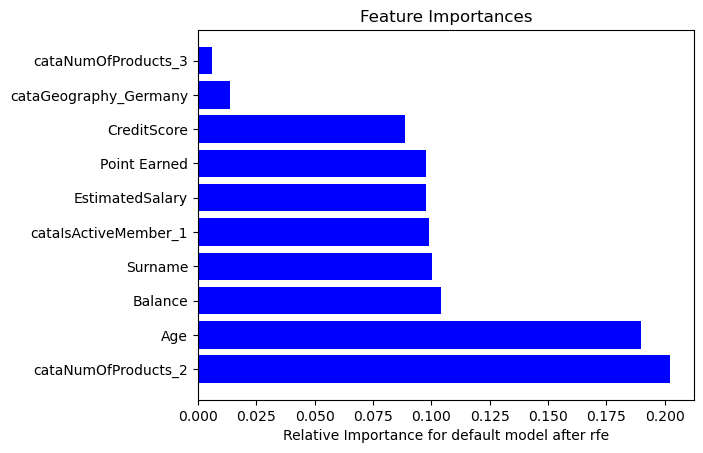

In [46]:
plt.title('Feature Importances')
plt.barh(feature_importances['index'], feature_importances['values'], color='blue')
plt.yticks(feature_importances['index'])
plt.xlabel('Relative Importance for default model after rfe')
plt.show()

## hyper parameter tuning  framing the grid search cv 


In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
#linspace generates the samples 
train_results = []
test_results = []
for i in max_depths:
    modelrf=RandomForestClassifier(max_depth=i)
    modelrf.fit(X_train,Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
max_depths = np.linspace(1, 10, 14, endpoint=True)
#linspace generates the samples 
train_results = []
test_results = []
for i in max_depths:
    modelrf=RandomForestClassifier(max_depth=i)
    modelrf.fit(X_train,Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
max_depths = np.linspace(4, 12, 14, endpoint=True)
#linspace generates the samples 
train_results = []
test_results = []
for i in max_depths:
    modelrf=RandomForestClassifier(max_depth=i)
    modelrf.fit(X_train,Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
## max depth should be in between 1-5 for better model to be precise 1-8

## min_sample_leaf

In [ ]:
min_samples_leafs=[5,10,15,20,25,30]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    modelrf=RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples leaf')
plt.show()

In [ ]:
min_samples_leafs=[5,10,15,20]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    modelrf=RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples leaf')
plt.show()

## min_samples_split


In [ ]:
min_samples_splits=[5,10,15,20]

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    modelrf=RandomForestClassifier(min_samples_split=min_samples_split)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [ ]:
min_samples_splits=[5,10,15,20,25,30]

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    modelrf=RandomForestClassifier(min_samples_split=min_samples_split)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [ ]:
min_samples_splits=[20,25,30,40,50,60,70,80,90]

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    modelrf=RandomForestClassifier(min_samples_split=min_samples_split)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

## min sample split should be in between 5-10

## n_estimators

In [ ]:
n_estimators_l=[100,200,300]

train_results = []
test_results = []

for i in n_estimators_l:
    modelrf=RandomForestClassifier(n_estimators=i)
    modelrf.fit(X_train, Y_train)

    train_pred = modelrf.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelrf.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_l, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators_l, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree n_estimators')
plt.show()

In [ ]:
##

In [ ]:
## max_leaf nodes will be in between 10- 40 
param_grid_with = {    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    #'min_samples_leaf': [5,10,15,20,25,27 ],

              #"min_samples_split": [2, 10, 20],
              "max_depth": [None, 1,2,3,4,5,6,7.4,8]
              }

In [ ]:
param_griid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

In [ ]:
param_grid = {    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5,10,15,20,25,27 ],
    "max_depth": [None,6,6.5,7.4,8,9,10],
    "min_samples_split": [2, 10, 20],

              }

In [ ]:
randomforest=RandomForestClassifier()


In [ ]:
randomforest=RandomForestClassifier()
model = RandomizedSearchCV(estimator=randomforest, param_distributions=param_grid, n_iter=10, cv=5)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
model.best_estimator_

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
print('train evelution metrics\n')
evalmat(Y_train,train_pred)
print('test evelution metrics\n')
evalmat(Y_test,test_pred)

In [ ]:
rfi=model.best_estimator_.feature_importances_
pd.Series(rfi).nunique()
feature_importances=pd.DataFrame({'index':X_train.columns,'values':rfi})
feature_importances=feature_importances.sort_values(by='values',ascending=False)
feature_importances
plt.title('Feature Importances')
plt.barh(feature_importances['index'], feature_importances['values'], color='blue')
plt.yticks(feature_importances['index'])
plt.xlabel('Relative Importance for default model after rfe')
plt.show()

In [ ]:
def get_predictions(x_train,y_train):
    y_train_proba = pd.DataFrame({'Exited':y_train.values,
                                  'Exited_Prob':model.predict_proba(x_train)[:,1]})
    y_train_proba['Cust_ID'] = y_train.index
    y_train_proba = y_train_proba.reindex(['Cust_ID','Exited','Exited_Prob'], axis=1)
    y_train_proba['predicted'] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_proba
    
   

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show

    return None

In [ ]:
y_train_proba=get_predictions(X_train,Y_train)    
y_test_proba=get_predictions(X_test,Y_test) 
print('train')
print(y_train_proba.head())
draw_roc(Y_train,y_train_proba['predicted'])
print('test')
print(y_test_proba.head())
draw_roc(Y_test,y_test_proba['predicted'])

In [ ]:
evalmat(Y_train,y_train_proba.predicted)
print('test_proba mertrics')
evalmat(Y_test,y_test_proba.predicted)

In [ ]:
for i in range(10):
        y_train_proba[i/10] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > i/10 else 0)


In [ ]:
y_train_proba

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_proba.Exited, y_train_proba[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_proba['final_predicted'] = y_train_proba.Exited_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_test_proba['final_predicted'] = y_test_proba.Exited_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_proba.head()



In [ ]:

y_train_proba['final_predicted'] = y_train_proba.Exited_Prob.map( lambda x: 1 if x > 0.56 else 0)
y_test_proba['final_predicted'] = y_test_proba.Exited_Prob.map( lambda x: 1 if x > 0.56else 0)
evalmat(Y_train,y_train_proba['final_predicted'])
draw_roc(Y_train,y_train_proba['final_predicted'])
evalmat(Y_test,y_test_proba['final_predicted'])
draw_roc(Y_test,y_test_proba['final_predicted'])